<a href="https://colab.research.google.com/github/manuelmj39/Stock-Prediction/blob/master/sunpharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Get the stock quote
df = web.DataReader('SUNPHARMA.NS', data_source='yahoo', start='2015-06-01', end='2020-06-23')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-01,917.799988,869.099976,915.549988,877.650024,14265602.0,851.800903
2015-06-02,888.400024,856.849976,887.200012,860.750000,7192196.0,835.398621
2015-06-03,863.000000,840.500000,861.599976,842.400024,6496553.0,817.589111
2015-06-04,842.500000,818.599976,835.000000,831.549988,6628714.0,807.058716
2015-06-05,860.599976,830.000000,831.549988,847.900024,4696506.0,822.927124
...,...,...,...,...,...,...
2020-06-18,488.500000,483.000000,485.649994,484.250000,4077225.0,483.329376
2020-06-19,491.950012,485.200012,486.799988,488.100006,8114839.0,487.172058
2020-06-22,501.200012,486.000000,492.200012,493.200012,9203804.0,492.262360


In [3]:
# Get the no of rows and columns in the data set
df.shape 

(1246, 6)

<function matplotlib.pyplot.show>

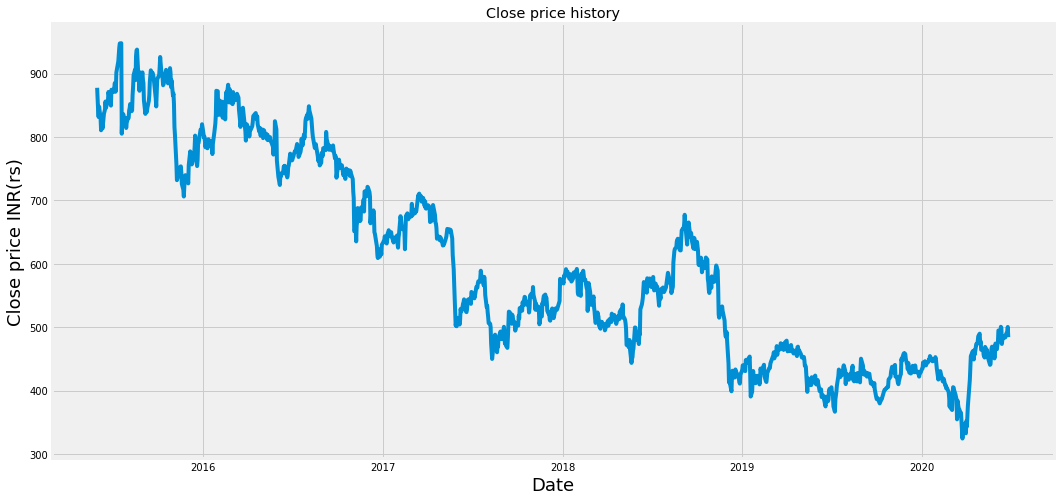

In [4]:
# Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price INR(rs)', fontsize=18)
plt.show



In [5]:
#Create a new data framme with only the close column
data = df.filter(['Close'])
#Convert the data frame to a numpy array
dataset = data .values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.80)
training_data_len

997

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.88716925],
       [0.86006415],
       [0.83063356],
       ...,
       [0.27056939],
       [0.28219729],
       [0.25645548]])

In [7]:
#Create the training data
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])
   if i<=61:
     print(x_train)
     print(y_train)
     print()


[array([0.88716925, 0.86006415, 0.83063356, 0.81323174, 0.83945473,
       0.81002404, 0.77971135, 0.79967919, 0.79398555, 0.78436245,
       0.82309545, 0.82694463, 0.83303933, 0.85252604, 0.8363272 ,
       0.85388937, 0.85517243, 0.87666395, 0.86864471, 0.870409  ,
       0.84210102, 0.88227743, 0.87987165, 0.87666395, 0.87650361,
       0.88917406, 0.89951881, 0.87698474, 0.87874904, 0.92550118,
       0.9478749 , 0.95412995, 0.97072975, 0.98933436, 0.99943869,
       1.        , 0.77105052, 0.81804328, 0.80890132, 0.82068967,
       0.80064156, 0.79494791, 0.81034483, 0.78548516, 0.79855657,
       0.81226947, 0.81090614, 0.82983163, 0.83544511, 0.8459503 ,
       0.827907  , 0.82959102, 0.86872498, 0.88941458, 0.9193264 ,
       0.93295912, 0.90657578, 0.96752205, 0.98179635, 0.98380116])]
[0.9087409391915598]

[array([0.88716925, 0.86006415, 0.83063356, 0.81323174, 0.83945473,
       0.81002404, 0.77971135, 0.79967919, 0.79398555, 0.78436245,
       0.82309545, 0.82694463, 0.833

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(937, 60, 1)

In [10]:
#Build he LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

937/937 [==============================] - 21s 22ms/step - loss: 0.0043


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 930 to 1237
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [14]:
#Convert the data to a umpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [16]:
#get the models prdiction 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15.589367724805472

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


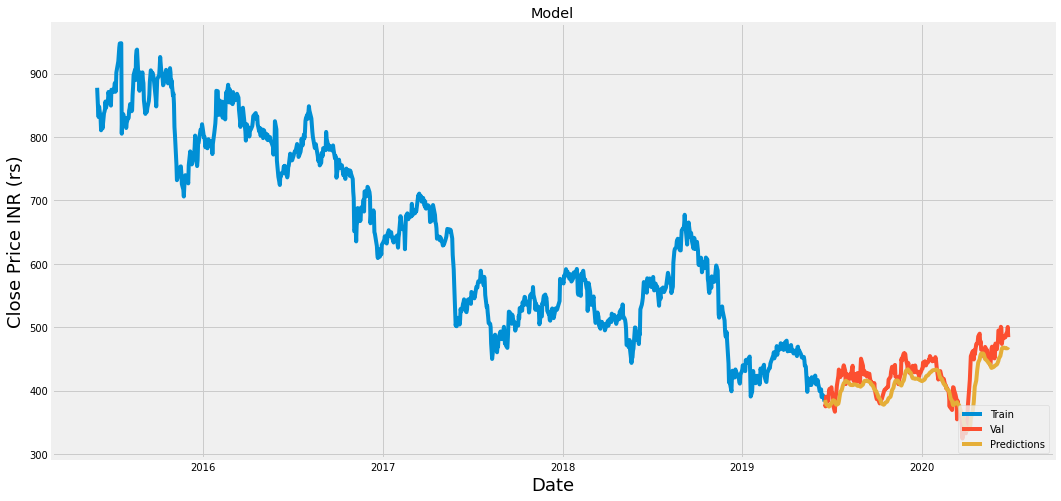

In [18]:
#Plot the data
train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualise the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-18,378.450012,385.249115
2019-06-19,375.200012,382.499084
2019-06-20,390.500000,379.567444
2019-06-21,382.799988,377.871826
2019-06-24,383.450012,376.500824
...,...,...
2020-06-18,484.250000,467.174103
2020-06-19,488.100006,466.846985
2020-06-22,493.200012,466.809814


In [20]:
#Get the Quote
sunpharma_quote = web.DataReader('SUNPHARMA.NS', data_source='yahoo', start='2015-06-01', end='2020-06-23')
#Create a new dataframe
new_df = sunpharma_quote.filter(['Close'])
#Get the last 60 days closing price values and convet the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Appwnd the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[469.23688]]
